In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test4 = df.copy()
test4

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
test4.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
test4.loc[df.CityLocation=='Delhi','CityLocation']='New Delhi'

In [6]:
test4.loc[df.AmountInUSD.isnull(),'AmountInUSD'] = '0'

In [7]:
city = []
amount = []

In [8]:
for i in test4['CityLocation']:
    city.append(i)
for i in test4['AmountInUSD']:
    amount.append(i)

In [9]:
for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))

In [10]:
dic = dict()


In [11]:
np_city = np.array(city)
np_amount = np.array(amount,dtype = 'int64')
#print(len(np_city))
#print(len(np_amount))

In [12]:
for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()

In [13]:
print(len(np_city))
print(len(np_amount))

2372
2372


In [14]:
for i in range(0,len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]] += np_amount[i]
    else:
        dic[np_city[i]] = np_amount[i]
    

In [15]:
dic

{'Bangalore': 8422974108,
 'Mumbai': 2354934500,
 'New Delhi': 2818247500,
 'Hyderabad': 195362000,
 'Ahmedabad': 98186000,
 'Gurgaon': 2069021500,
 'Noida': 170638000,
 'Pune': 366653000,
 'Kolkata': 13865000,
 'Trivandrum': 100000,
 'Chennai': 411105000,
 'Chandigarh': 26100000,
 'Jaipur': 35560000,
 'Vadodara': 6040000,
 'Surat': 0,
 'Missourie': 350000,
 'Panaji': 825000,
 'Gwalior': 900000,
 'Karur': 0,
 'Udupi': 12000000,
 'Kochi': 0,
 'Indore': 1672000,
 'Singapore': 3850000,
 'Goa': 2380000,
 'Agra': 0,
 'Hubli': 0,
 'Kerala': 27000,
 'Kozhikode': 0,
 'US': 3000000,
 'Coimbatore': 1650000,
 'Siliguri': 0,
 'nan': 1271863868,
 'USA': 16600000,
 'Lucknow': 1000000,
 'Kanpur': 220000,
 'SFO': 2700000,
 'London': 0,
 'Seattle': 0,
 'Varanasi': 52000,
 'Bhopal': 1900000,
 'Jodhpur': 160000,
 'Boston': 3000000,
 'Belgaum': 500000,
 'New York': 2950000,
 'Nagpur': 0,
 'India': 30000000,
 'Udaipur': 0,
 'Dallas': 1000000}

In [16]:
xaxis = []
yaxis = []

In [19]:
for i in dic:
    xaxis.append(i)
    yaxis.append(dic[i])

In [21]:
npx = np.array(xaxis)
npy = np.array(yaxis)

In [22]:
npx = npx[np.argsort(npy)]
npy = np.sort(npy)

In [24]:
npx = npx[len(npx)-1:len(npx)-1-10:-1]
npy = npy[len(npy)-1:len(npy)-1-10:-1]
print(npx)
print(npy)

['Bangalore' 'New Delhi' 'Mumbai' 'Gurgaon' 'nan' 'Chennai' 'Pune'
 'Hyderabad' 'Noida' 'Ahmedabad']
[8422974108 2818247500 2354934500 2069021500 1271863868  411105000
  366653000  195362000  170638000   98186000]


(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09,
        8.e+09, 9.e+09]),
 [Text(0, 0.0, '0'),
  Text(0, 1000000000.0, '1'),
  Text(0, 2000000000.0, '2'),
  Text(0, 3000000000.0, '3'),
  Text(0, 4000000000.0, '4'),
  Text(0, 5000000000.0, '5'),
  Text(0, 6000000000.0, '6'),
  Text(0, 7000000000.0, '7'),
  Text(0, 8000000000.0, '8'),
  Text(0, 9000000000.0, '9')])

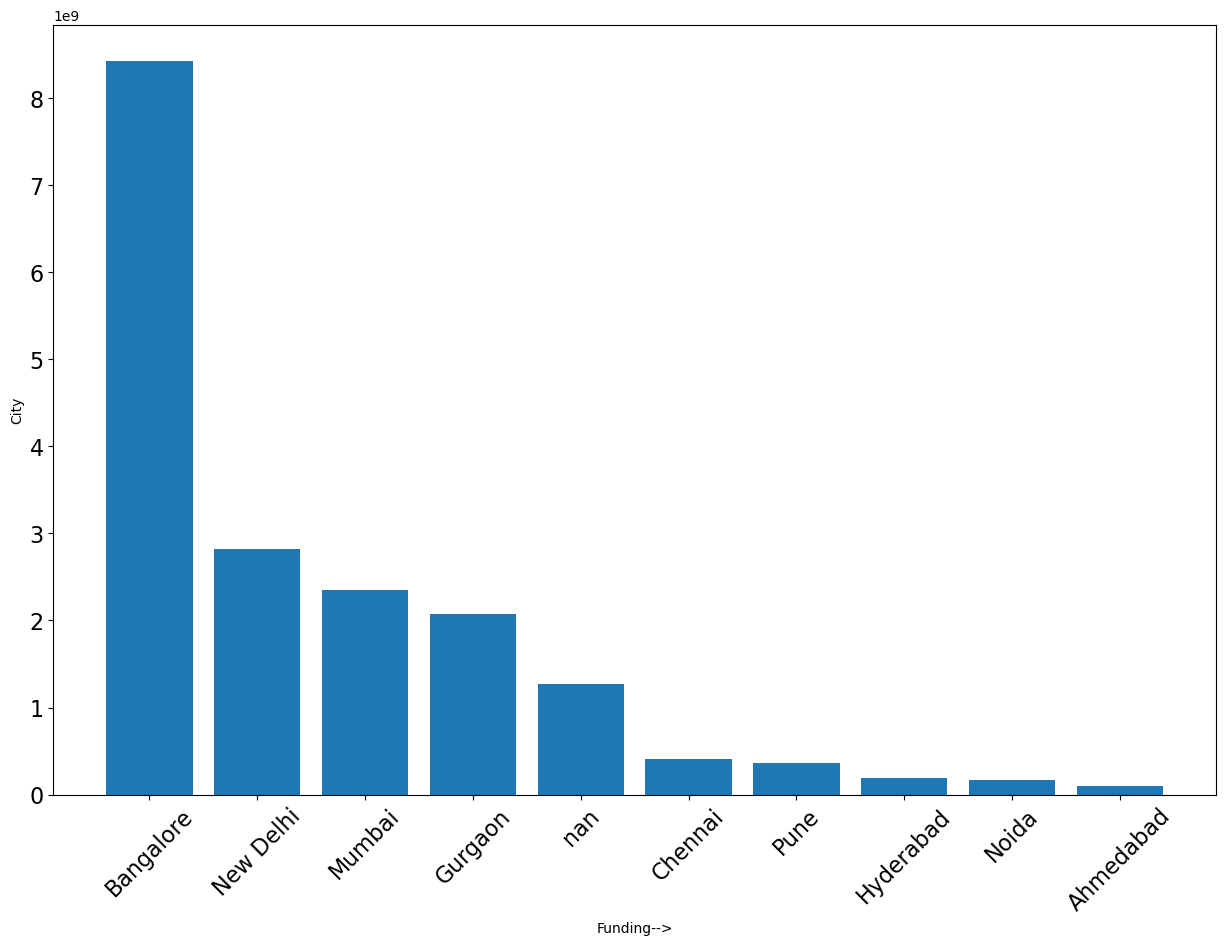

In [31]:
plt.subplots(figsize=(15, 10))
plt.bar(npx,npy)

plt.xlabel("Funding-->")
plt.ylabel("City")
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)

In [33]:
for i in range(len(npx)):
    print(npx[i],'-->', format((npy[i]*100)/sum(npy), '.2f'), 'Percent')

Bangalore --> 46.33 Percent
New Delhi --> 15.50 Percent
Mumbai --> 12.95 Percent
Gurgaon --> 11.38 Percent
nan --> 7.00 Percent
Chennai --> 2.26 Percent
Pune --> 2.02 Percent
Hyderabad --> 1.07 Percent
Noida --> 0.94 Percent
Ahmedabad --> 0.54 Percent
